<a href="https://colab.research.google.com/github/memari-majid/opencv/blob/main/002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometric Transformations of Images

### Scaling
* Scaling is just resizing of the image. 
* OpenCV comes with a function cv2.resize() for this purpose. 
* The size of the image can be specified manually, or you can specify the scaling factor. 
* Different **interpolation** methods are used. 
  * Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for **zooming**. 
  * By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes.

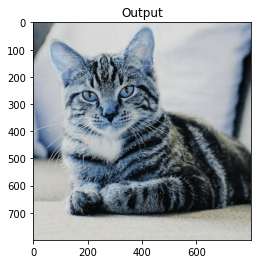

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Notebooks/OpenCV/cat.png')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
height, width = img.shape[:2]
dst = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.imshow(dst),plt.title('Output')
plt.show()

### Translation

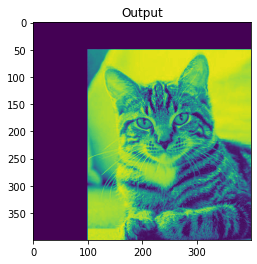

In [23]:
img = cv2.imread('/content/drive/MyDrive/Notebooks/OpenCV/cat.png',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst),plt.title('Output')
plt.show()

### Rotation
Rotation of an image for an angle is achieved by the transformation matrix of the form M = [[cosine, -sine], [sine, coseine]]

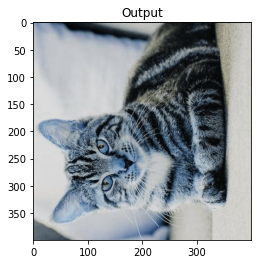

In [18]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst),plt.title('Output')
plt.show()

### Affine Transformation
* In affine transformation, all parallel lines in the original image will still be parallel in the output image. 
* To find the transformation matrix, we need three points from input image and their corresponding locations in output image.

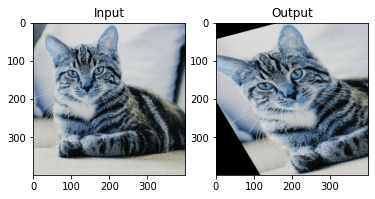

In [17]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Perspective Transformation
* For perspective transformation, you need a 3x3 transformation matrix.
* Straight lines will remain straight even after the transformation. 
* To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. 
* Among these 4 points, 3 of them should not be collinear. 
* Then transformation matrix can be found by the function cv2.
getPerspectiveTransform. 
* Then apply cv2.warpPerspective with this 3x3 transformation matrix.

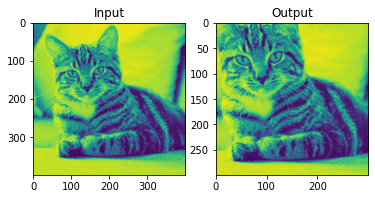

In [24]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()